<a href="https://colab.research.google.com/github/uniainiyah/HCI/blob/main/Home_Credit_Scorecard_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTENC

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [83]:
df = pd.read_csv('application_train.csv')
pd.set_option('display.max_columns', None)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#1. Data Exploration

##1.1. Descriptive Statistics Analysis

In [84]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [26]:
missing_values = df.isnull().sum()
print(missing_values.to_string())

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         8
AMT_GOODS_PRICE                    99
NAME_TYPE_SUITE                   506
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     82113
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [27]:
df[df['SK_ID_CURR'].duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


We remove some features that are not relevant and contain lots of null value.

In [7]:
columns = ['SK_ID_CURR', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
df.drop(columns=columns, axis=1, inplace=True)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [ ]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
categoricals = ['NAME_CONTRACT_TYPE',	'CODE_GENDER',	'FLAG_OWN_CAR',	'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',	'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
df[categoricals].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,124203,124203,124203,124203,123697,124203,124203,124203,124203,124202,124202
unique,2,3,2,2,7,8,5,6,6,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3
freq,112413,81779,82112,86108,100318,64325,88333,79472,110286,21616,27588


In [8]:
df.drop(columns=['FLAG_MOBIL','ORGANIZATION_TYPE'], axis=1, inplace=True)
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY'],
      dtype='object')

##1.2. Univariate Analysis

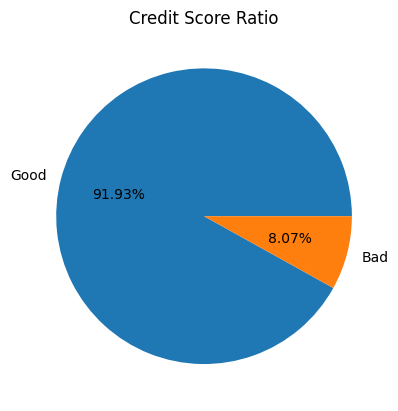

In [10]:
df.groupby('TARGET').size().plot(kind='pie', labels=['Good', 'Bad'], autopct='%.2f%%')
plt.title('Credit Score Ratio')
plt.show()

In [11]:
df['AGE'] = df['DAYS_BIRTH']/(-365.2425)
df['AGE_EMPLOYED'] = df['DAYS_EMPLOYED']/(-365.2425)
df['AGE_REGISTRATION'] = df['DAYS_REGISTRATION']/(-365.2425)
df['AGE_ID_PUBLISH'] = df['DAYS_ID_PUBLISH']/(-365.2425)
df.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'], axis=1, inplace=True)

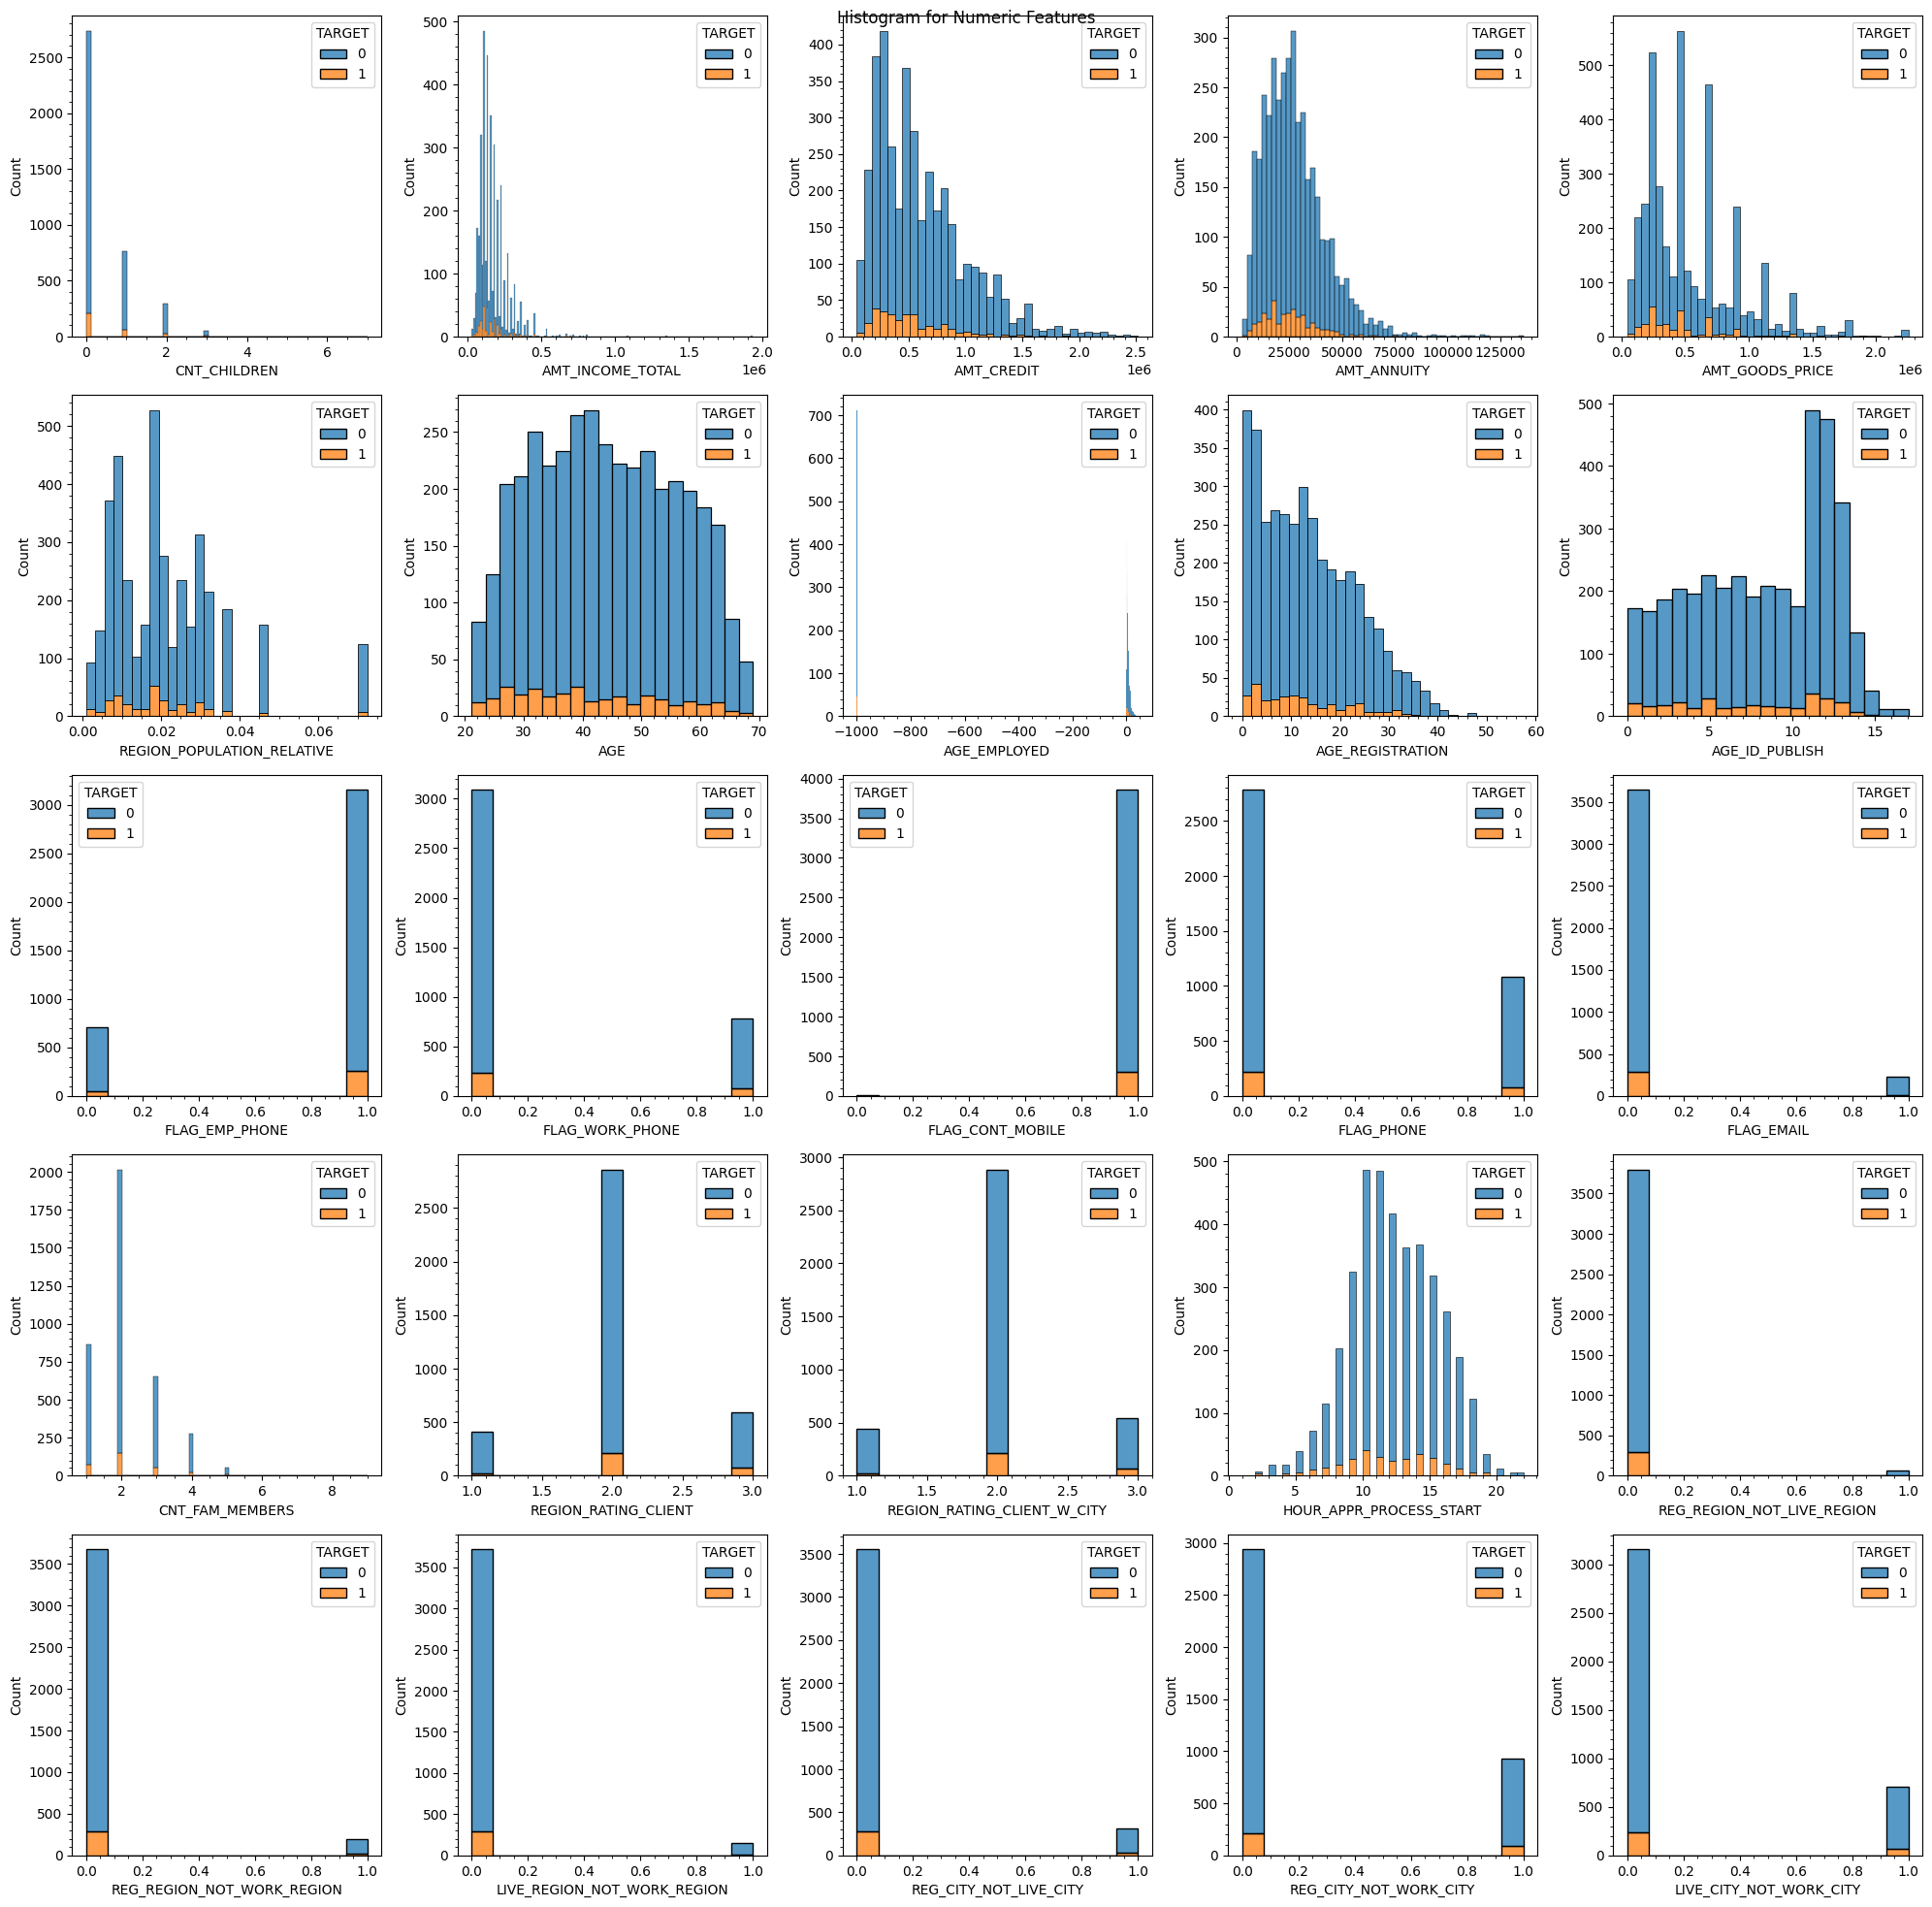

In [7]:
# histogram for numeric columns
numeric_columns = ['CNT_CHILDREN',	'AMT_INCOME_TOTAL',	'AMT_CREDIT',	'AMT_ANNUITY',	'AMT_GOODS_PRICE',	'REGION_POPULATION_RELATIVE',	'AGE',	'AGE_EMPLOYED',	'AGE_REGISTRATION',	'AGE_ID_PUBLISH',	'FLAG_EMP_PHONE',	'FLAG_WORK_PHONE',	'FLAG_CONT_MOBILE',	'FLAG_PHONE',	'FLAG_EMAIL',	'CNT_FAM_MEMBERS',	'REGION_RATING_CLIENT',	'REGION_RATING_CLIENT_W_CITY',	'HOUR_APPR_PROCESS_START',	'REG_REGION_NOT_LIVE_REGION',	'REG_REGION_NOT_WORK_REGION',	'LIVE_REGION_NOT_WORK_REGION',	'REG_CITY_NOT_LIVE_CITY',	'REG_CITY_NOT_WORK_CITY',	'LIVE_CITY_NOT_WORK_CITY']
fig, axes = plt.subplots(5, 5, figsize=(20,20))

plt.suptitle('Histogram for Numeric Features')
i = 0
for y in axes:
    for ax in y:
        column = numeric_columns[i]
        sns.histplot(df, x=column, hue='TARGET', multiple='stack', ax=ax)
        ax.minorticks_on()
        i += 1

fig.tight_layout(pad=1)
plt.show()

In [ ]:
df['AGE_EMPLOYED'].value_counts()

-1000.001369    55374
 0.547581         156
 0.613291         152
 0.629719         151
 0.544843         151
                ...  
 38.223920          1
 32.381226          1
 27.860942          1
 25.897862          1
 23.803364          1
Name: AGE_EMPLOYED, Length: 12574, dtype: int64

In [12]:
df["AGE_EMPLOYED"]=df["AGE_EMPLOYED"].replace(min(df['AGE_EMPLOYED']),0)

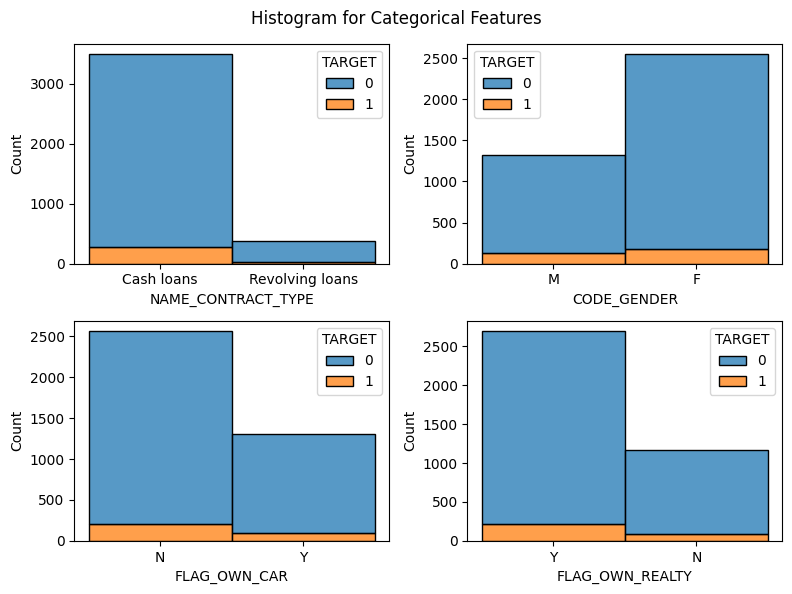

In [9]:
categorical_columns1 = ['NAME_CONTRACT_TYPE',	'CODE_GENDER',	'FLAG_OWN_CAR',	'FLAG_OWN_REALTY']

fig, axes = plt.subplots(2, 2, figsize=(8,6))

plt.suptitle('Histogram for Categorical Features')

i = 0
for y in axes:
    for ax in y:
        column = categorical_columns1[i]
        sns.histplot(df, x=column, hue='TARGET', multiple='stack', ax=ax)
        i += 1

fig.tight_layout(pad=1)
plt.show()

In [ ]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [13]:
df["CODE_GENDER"]=df["CODE_GENDER"].replace("XNA","F")

In [14]:
df["NAME_CONTRACT_TYPE"]=df["NAME_CONTRACT_TYPE"].replace("Cash loans",0)
df["NAME_CONTRACT_TYPE"]=df["NAME_CONTRACT_TYPE"].replace("Revolving loans",1)

df["CODE_GENDER"]=df["CODE_GENDER"].replace("F",0)
df["CODE_GENDER"]=df["CODE_GENDER"].replace("M",1)

df["FLAG_OWN_CAR"]=df["FLAG_OWN_CAR"].replace("N",0)
df["FLAG_OWN_CAR"]=df["FLAG_OWN_CAR"].replace("Y",1)

df["FLAG_OWN_REALTY"]=df["FLAG_OWN_REALTY"].replace("N",0)
df["FLAG_OWN_REALTY"]=df["FLAG_OWN_REALTY"].replace("Y",1)

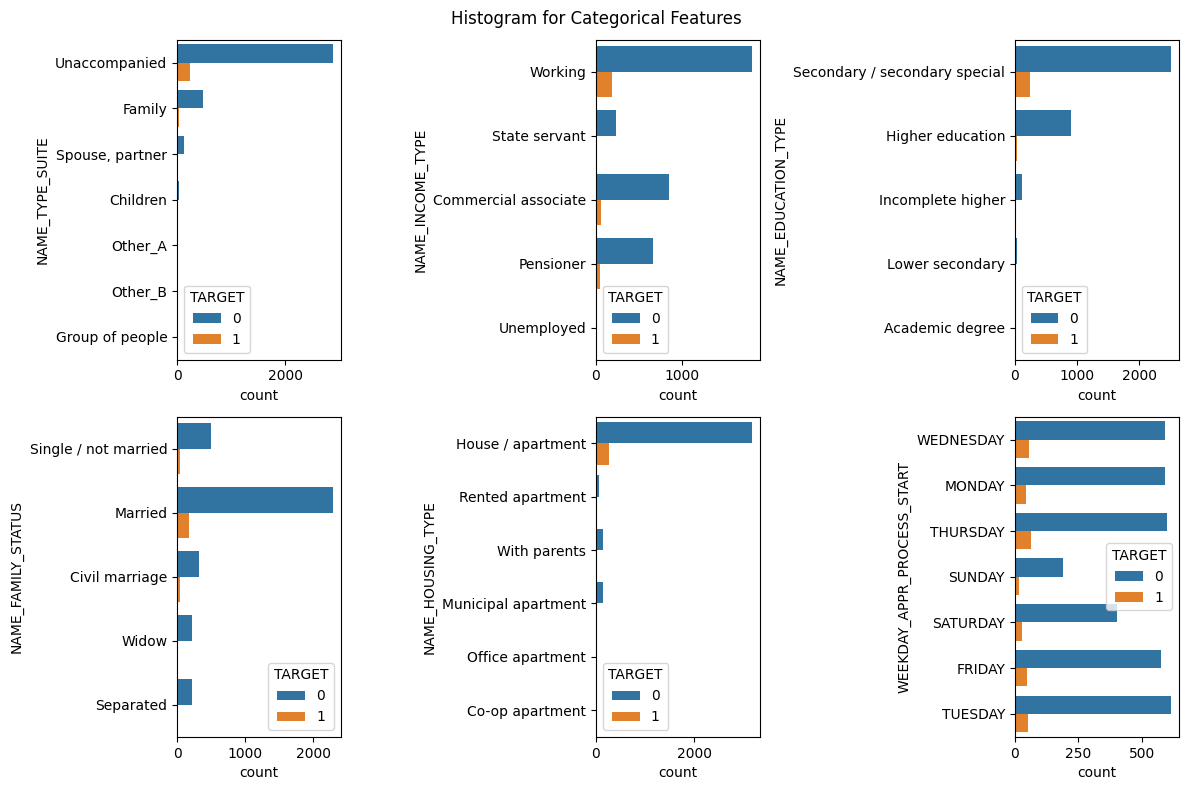

In [12]:
categorical_columns2 = ['NAME_TYPE_SUITE',	'NAME_INCOME_TYPE',	'NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']
fig, axes = plt.subplots(2, 3, figsize=(12,8))

plt.suptitle('Histogram for Categorical Features')

i = 0
for y in axes:
    for ax in y:
        column = categorical_columns2[i]
        sns.countplot(df, y=column, hue='TARGET', ax=ax)
        i += 1
fig.tight_layout(pad=1)
plt.show()

##1.3. Multivariate Analysis

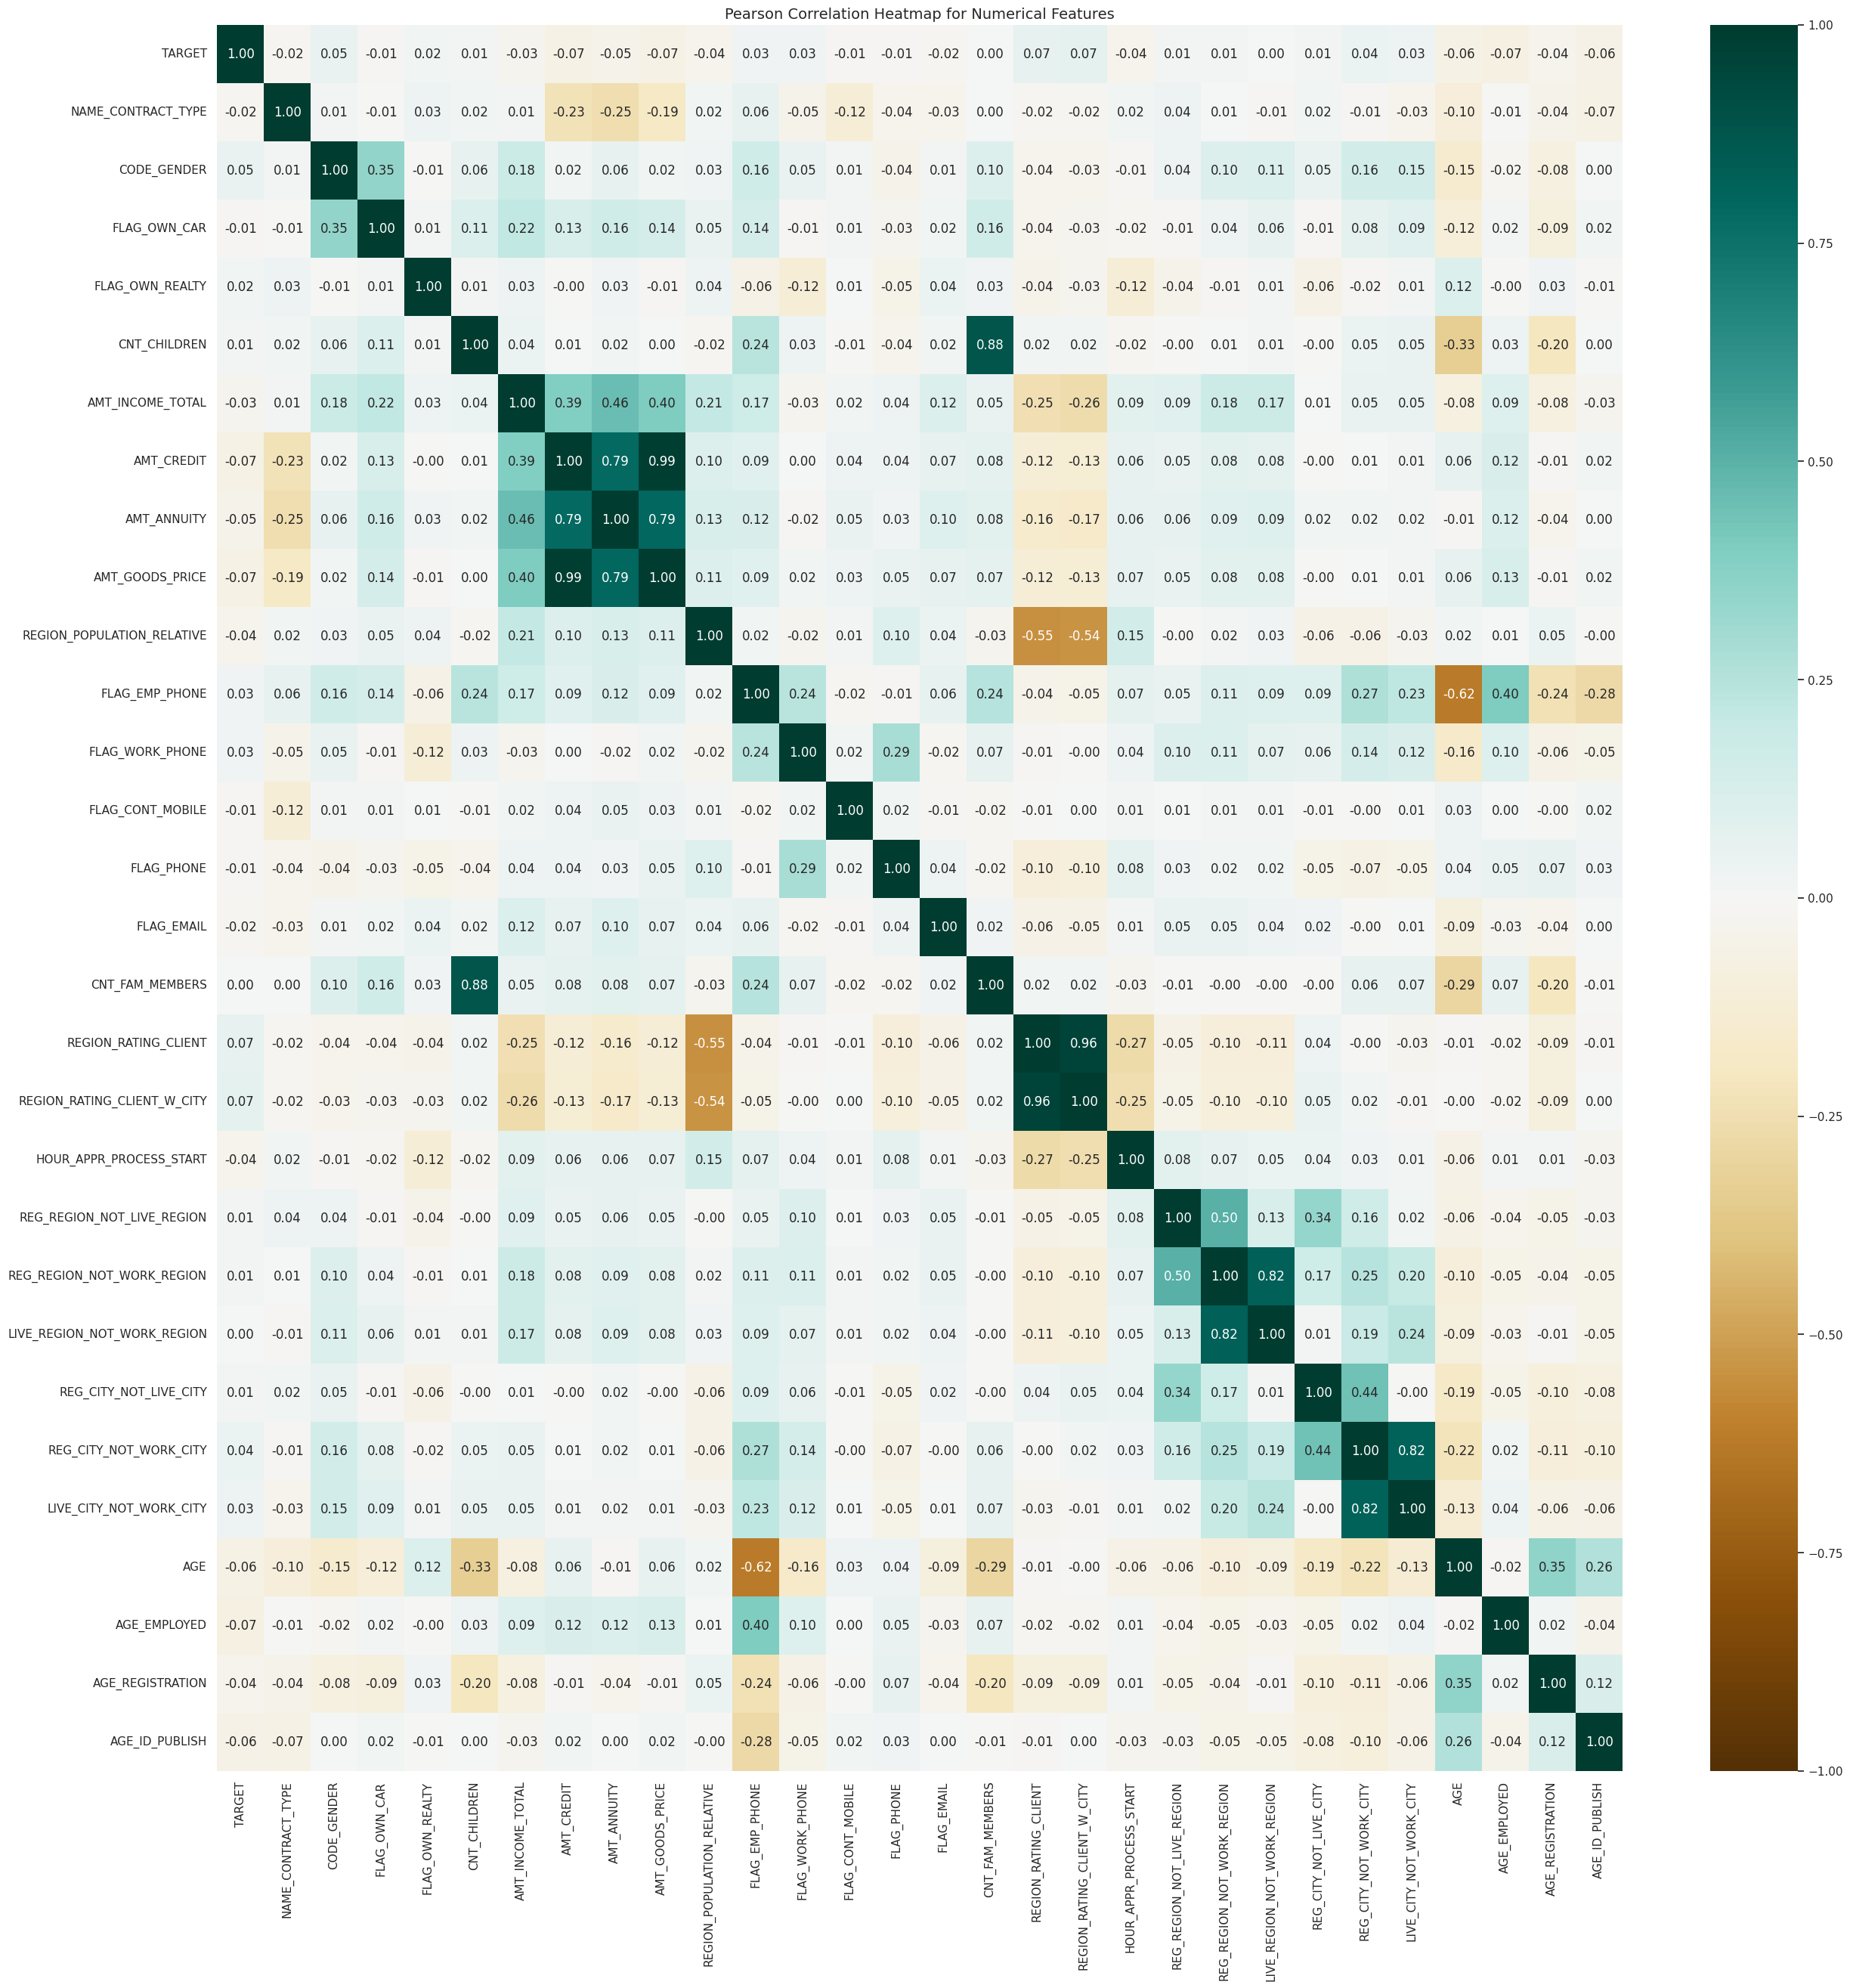

In [14]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(method='pearson', numeric_only=True), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2f')
sns.set(rc={"figure.figsize": (30,30)})
plt.title('Pearson Correlation Heatmap for Numerical Features', fontsize=14)
plt.show()

In [15]:
columns=['CNT_CHILDREN', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY','NAME_TYPE_SUITE',	'NAME_INCOME_TYPE',	'NAME_FAMILY_STATUS',	'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START']
df.drop(columns=columns, axis=1, inplace=True)

In [16]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'AGE',
       'AGE_EMPLOYED', 'AGE_REGISTRATION', 'AGE_ID_PUBLISH'],
      dtype='object')

#2. Data Pre-Processing

##2.1. Data Cleansing

###2.1.1. Handle missing values dan outliers

In [37]:
df.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_EDUCATION_TYPE            0
REGION_POPULATION_RELATIVE     0
FLAG_PHONE                     0
CNT_FAM_MEMBERS                1
REGION_RATING_CLIENT           1
HOUR_APPR_PROCESS_START        1
REG_REGION_NOT_LIVE_REGION     1
LIVE_REGION_NOT_WORK_REGION    1
REG_CITY_NOT_LIVE_CITY         1
REG_CITY_NOT_WORK_CITY         1
AGE                            0
AGE_EMPLOYED                   0
AGE_REGISTRATION               0
AGE_ID_PUBLISH                 0
dtype: int64

In [38]:
df[df.isna().any(axis=1)]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,AGE,AGE_EMPLOYED,AGE_REGISTRATION,AGE_ID_PUBLISH
41982,0,1,1,0,1,450000.0,675000.0,Lower secondary,0.015221,1,NaN,2.0,15.0,0.0,1.0,0.0,1.0,33.939095,3.178710,8.939266,12.290465
124202,0,0,0,1,1,117000.0,225000.0,Higher education,0.018209,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,29.005387,6.497053,7.748277,8.865343


In [16]:
df = df.dropna()

In [17]:
target = 'TARGET'
features = df.loc[:, df.columns != target].columns
x_data = df[features]
y_data = df[target]

# split data to 80% data train and 20% data test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=25, stratify=y_data)

# check amount of data on train and test
print('Number of data train rows =', x_train.shape[0])
print('Number of data test rows =', x_test.shape[0])

Number of data train rows = 246007
Number of data test rows = 61502


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124201 entries, 0 to 124201
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       124201 non-null  int64  
 1   NAME_CONTRACT_TYPE           124201 non-null  int64  
 2   CODE_GENDER                  124201 non-null  int64  
 3   FLAG_OWN_CAR                 124201 non-null  int64  
 4   FLAG_OWN_REALTY              124201 non-null  int64  
 5   AMT_INCOME_TOTAL             124201 non-null  float64
 6   AMT_CREDIT                   124201 non-null  float64
 7   NAME_EDUCATION_TYPE          124201 non-null  object 
 8   REGION_POPULATION_RELATIVE   124201 non-null  float64
 9   FLAG_PHONE                   124201 non-null  int64  
 10  CNT_FAM_MEMBERS              124201 non-null  float64
 11  REGION_RATING_CLIENT         124201 non-null  float64
 12  HOUR_APPR_PROCESS_START      124201 non-null  float64
 13 

In [65]:
from scipy import stats
cats = ['NAME_EDUCATION_TYPE']
nums = [i for i in df.columns if (i!='NAME_EDUCATION_TYPE') & (i!='TARGET')]
nums_not_binary = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'AGE', 'AGE_EMPLOYED', 'AGE_REGISTRATION', 'AGE_ID_PUBLISH']

outlier = pd.DataFrame()
filtered = np.array([True] * len(x_train))

for col in nums_not_binary:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    outlier[col] = x_train[col][(x_train[col] < low_limit) | (x_train[col] > high_limit)]
    filtered = ((x_train[col] >= low_limit) & (x_train[col] <= high_limit)) & filtered

outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11286 entries, 35762 to 259066
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AMT_INCOME_TOTAL            11286 non-null  float64
 1   AMT_CREDIT                  1443 non-null   float64
 2   REGION_POPULATION_RELATIVE  1680 non-null   float64
 3   CNT_FAM_MEMBERS             201 non-null    float64
 4   HOUR_APPR_PROCESS_START     114 non-null    float64
 5   AGE                         0 non-null      float64
 6   AGE_EMPLOYED                712 non-null    float64
 7   AGE_REGISTRATION            16 non-null     float64
 8   AGE_ID_PUBLISH              0 non-null      float64
dtypes: float64(9)
memory usage: 881.7 KB


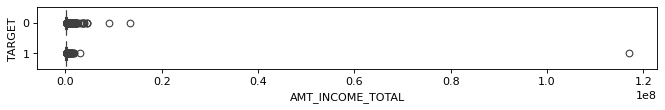

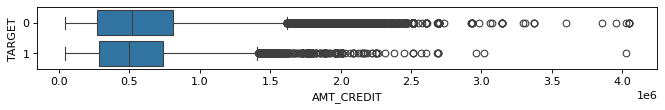

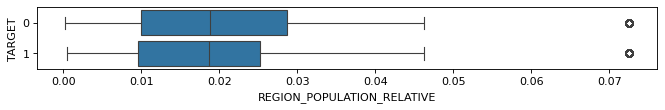

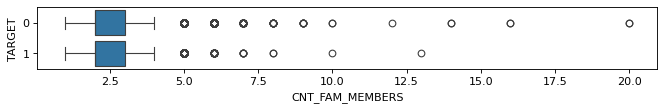

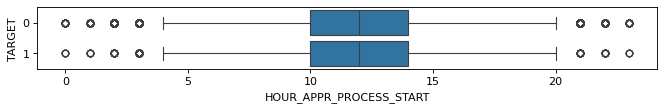

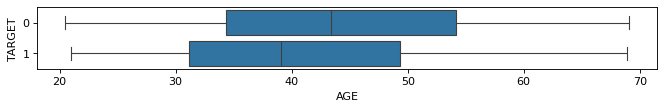

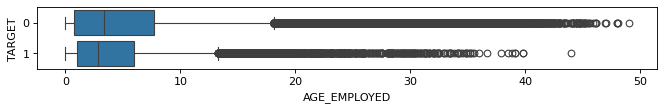

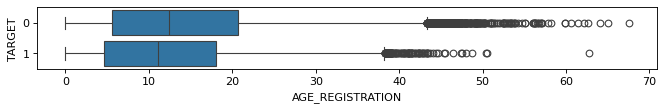

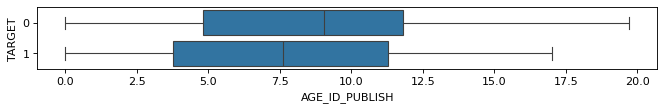

In [66]:
for i in nums_not_binary:
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = x_train[i], y=y_train, data = x_train,orient="h")
    plt.show()

###2.1.2. Feature Transformation and Feature Encoding

In [20]:
nums_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
    ])

edu_list = ['Lower Secondary', 'Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Academic degree']
edu_transformer = Pipeline(
    steps=[
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1, categories=[edu_list])),
    ]
    )

preprocessor = ColumnTransformer(
    transformers=[
        ('nums', nums_transformer, nums_not_binary),
        ('edu', edu_transformer, ['NAME_EDUCATION_TYPE']),
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('nums',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'REGION_POPULATION_RELATIVE',
                                  'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
                                  'AGE', 'AGE_EMPLOYED', 'AGE_REGISTRATION',
                                  'AGE_ID_PUBLISH']),
                                ('edu',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(categories=[['Lower '
                                                                              'Secondary',
                                                                              'Secondary '
                                                                              '/ '
                                                                              'secondary '
                                                                              'special',
                                                                              'Incomplete '
                                                                              'higher',
                                                                              'Higher '
                                                                              'education',
                                                                              'Academic '
                                                                              'degree']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['NAME_EDUCATION_TYPE'])])

###2.1.4. Handle Class Imbalance

In [31]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[6], random_state=25)
x_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)

In [32]:
data_after_smote = pd.DataFrame(x_resampled, columns=x_train.columns)
data_after_smote['TARGET'] = y_resampled

In [33]:
Y_train = data_after_smote['TARGET']
X_train = data_after_smote.drop(['TARGET'],axis=1)

##2.2. Feature Engineering

In [52]:
X=x_train.copy()

In [56]:
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Lower secondary',0)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Secondary / secondary special',1)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Incomplete higher',2)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Higher education',3)
X["NAME_EDUCATION_TYPE"]=X["NAME_EDUCATION_TYPE"].replace('Academic degree',4)

###2.2.1. Feature Selection

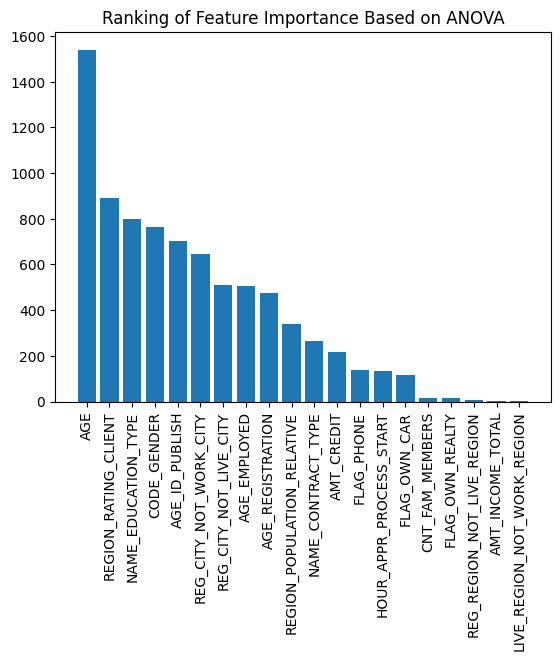

In [58]:
selector = SelectKBest(f_classif, k='all')
kbest_fit = selector.fit_transform(X, y_train)

columns = X.columns

feature_scores = list(zip(selector.scores_,columns))
sorted_feature_scores = sorted(feature_scores,reverse=True)

num_list = []
col_list = []
for i in range(len(columns)):
   num_list.append((sorted_feature_scores[i])[0])
   col_list.append((sorted_feature_scores[i])[1])

plt.bar(col_list,num_list)
plt.xticks(rotation=90)
plt.title('Ranking of Feature Importance Based on ANOVA')

plt.show()

#3. Machine Learning Modelling & Evaluation

##3.1. Model Evaluation

### Logistic Regression

F1 score data TRAIN : 67.489 %
F1 score data TEST  : 18.979 %
Accuracy score data TRAIN : 65.735 %
Accuracy score data TEST  : 60.047 %


<Axes: >

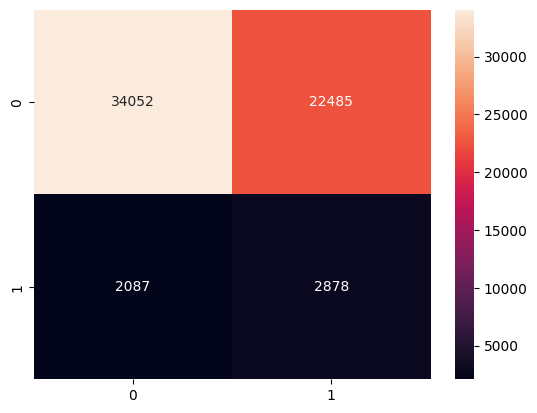

In [77]:
LRC = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]
)

LRC.fit(X_train, Y_train)
y_train_pred = LRC.predict(X_train)
y_pred = LRC.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "2d")

In [75]:
#Hyperparameter tuning logistic regression
param_grid = {
    'classifier__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C' : [1,2,3,4,5],
}

rs = RandomizedSearchCV(LRC, param_grid, n_iter=50, n_jobs=-1, cv=5, scoring='f1', random_state=25)
rs.fit(X_train, Y_train)

print('Best hyperparameters using randomized search:', rs.best_params_)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 20 is smaller than n_iter=50. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405,

Best hyperparameters using randomized search: {'classifier__penalty': 'l2', 'classifier__C': 1}


In [76]:
LR_best_clf = LogisticRegression(random_state=25, penalty='l2', C=1)

LR_best_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', LR_best_clf)
    ]
)

LR_best_pipe.fit(X_train, Y_train)

y_train_pred = LR_best_pipe.predict(X_train)
y_pred = LR_best_pipe.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

F1 score data TRAIN : 67.489 %
F1 score data TEST  : 18.979 %
Accuracy score data TRAIN : 65.735 %
Accuracy score data TEST  : 60.047 %


###Decision Tree

F1 score data TRAIN : 100.0 %
F1 score data TEST  : 12.239 %
Accuracy score data TRAIN : 100.0 %
Accuracy score data TEST  : 82.464 %


<Axes: >

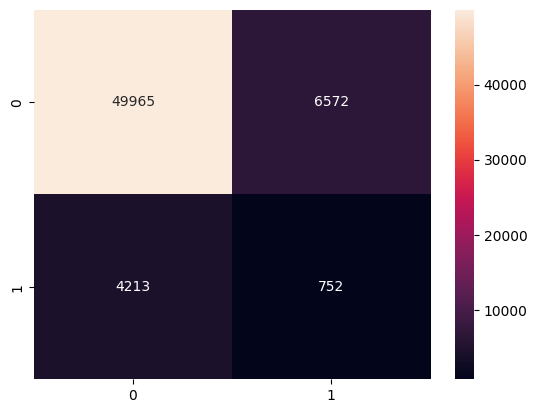

In [78]:
DTC = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=25))
    ]
)

DTC.fit(X_train, Y_train)
y_train_pred = DTC.predict(X_train)
y_pred = DTC.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "2d")

In [79]:
#Hyperparameter tuning decision tree
dtc = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=25))
    ]
)

param_grid = {
    'classifier__criterion' : ['gini', 'entropy'],
    'classifier__max_depth' : range(2, 22, 2),
    'classifier__max_features' : ['sqrt', 'log2', None],
    'classifier__min_samples_split' : range(2, 42, 2),
    'classifier__min_samples_leaf' : range(2, 22, 2),
}

rs = RandomizedSearchCV(dtc, param_grid, n_iter=50, n_jobs=-1, cv=5, scoring='f1', random_state=25)
rs.fit(X_train, Y_train)

print('Best hyperparameters using randomized search:', rs.best_params_)

Best hyperparameters using randomized search: {'classifier__min_samples_split': 20, 'classifier__min_samples_leaf': 10, 'classifier__max_features': None, 'classifier__max_depth': 20, 'classifier__criterion': 'gini'}


In [81]:
dt_best_clf = DecisionTreeClassifier(random_state=25, min_samples_split=20,
                                    min_samples_leaf=10, max_features=None,
                                    max_depth=20, criterion='gini')

dt_best_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('classifier', dt_best_clf)
    ]
)

dt_best_pipe.fit(X_train, Y_train)

y_train_pred = dt_best_pipe.predict(X_train)
y_pred = dt_best_pipe.predict(x_test)

print('F1 score data TRAIN :', round(f1_score(Y_train, y_train_pred)*100, 3), '%')
print('F1 score data TEST  :', round(f1_score(y_test, y_pred)*100, 3), '%')

print('Accuracy score data TRAIN :', round(accuracy_score(Y_train, y_train_pred)*100, 3), '%')
print('Accuracy score data TEST  :', round(accuracy_score(y_test, y_pred)*100, 3), '%')

F1 score data TRAIN : 90.702 %
F1 score data TEST  : 8.155 %
Accuracy score data TRAIN : 91.181 %
Accuracy score data TEST  : 87.877 %
